In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Open CSV and Convert to Dataframe
df = pd.read_csv('/Users/Daniel/Desktop/Research_Projects/NYCCT_Cosmic_Filaments/FilGalsProps.csv')

# Refine Dataframe to eliminate any galaxies that did not have 'distance to filament' values 
df = df[(df.d.notnull()) & (df['logmstar'] > 0)]
df

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
1069,14472,0.11432,4,0.115302,10.57630,0.099281,9.84892,0.173313,0.011573,0.008694,...,3.771253,3.707450,0.0,1.500600e+09,150060.0,NaN,NaN,NaN,NaN,NaN
1077,14480,0.20018,4,0.201238,10.36390,0.110768,9.77697,0.200401,0.016244,0.009546,...,7.632137,1.612440,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
1080,14485,0.18342,5,0.184461,10.85630,0.105653,9.80181,0.187472,0.007964,0.006806,...,6.768023,3.580060,0.0,1.501860e+09,150186.0,NaN,NaN,NaN,NaN,NaN
1081,14486,0.19952,4,0.200574,10.79260,0.106621,9.75812,0.204969,0.011286,0.007187,...,7.773001,1.875860,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
1082,14487,0.20088,4,0.201935,10.08270,0.107895,9.49168,0.241306,0.012405,0.007280,...,7.868330,1.877050,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110767,747326,0.18675,4,0.187759,11.47670,0.106227,9.81439,0.171897,0.010655,0.007496,...,-0.472030,2.081950,300009.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
110802,748601,0.19344,4,0.194463,10.21610,0.107744,9.78807,0.191085,0.009743,0.007355,...,3.620104,0.671291,0.0,1.501450e+09,150145.0,NaN,NaN,NaN,NaN,NaN
110807,748610,0.12744,4,0.128396,10.51020,0.096180,9.85412,0.160613,0.012617,0.008271,...,1.680548,0.087637,300044.0,1.500510e+09,150051.0,NaN,NaN,NaN,NaN,NaN
110877,750269,0.19007,4,0.191007,9.30235,0.108101,9.06462,0.245388,0.008252,0.005942,...,7.017423,2.178990,0.0,1.500350e+09,150035.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# Assigning variables to columns of dataframe 2
logage = df['logage']
logmstar = df['logmstar']
gminusi = df['gminusi']
d = df['d']

In [3]:
logage

1069      9.84892
1077      9.77697
1080      9.80181
1081      9.75812
1082      9.49168
           ...   
110767    9.81439
110802    9.78807
110807    9.85412
110877    9.06462
110883    9.80933
Name: logage, Length: 10117, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x10df0dac0>,
 'caps': [<matplotlib.lines.Line2D at 0x10df2a0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10df0d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x10df2a640>],
 'fliers': [<matplotlib.lines.Line2D at 0x10df2a910>],
 'means': []}

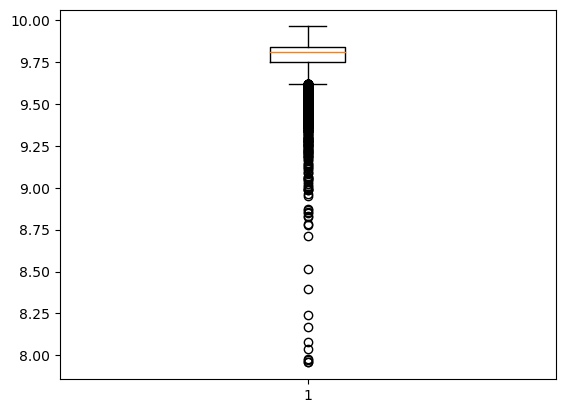

In [4]:
# Box Plot
plt.boxplot(logage)

In [5]:
# Function that returns upper and lower bound values
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [16,84])
 IQR = Q3 - Q1
 lower_range = Q1 - (2 * IQR)
 upper_range = Q3 + (2 * IQR)
 return lower_range,upper_range

In [6]:
# Get upper and lowerbound values 
lowerbound,upperbound = outlier_treatment(df.logage)

print(lowerbound)
print(upperbound)

9.5135784
10.050643999999998


In [7]:
# Check what values are considered outliers 
df[(df.logage < lowerbound) | (df.logage > upperbound)]

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
1082,14487,0.20088,4,0.201935,10.08270,0.107895,9.49168,0.241306,0.012405,0.007280,...,7.868330,1.877050,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
1109,14518,0.17236,4,0.173390,9.68806,0.115392,9.47707,0.256020,0.011812,0.007421,...,5.967313,3.131580,302974.0,1.502000e+09,150200.0,NaN,NaN,NaN,NaN,NaN
1144,14553,0.20013,4,0.201181,9.63999,0.136554,9.42825,0.286754,0.009218,0.007218,...,7.032967,2.649220,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
1514,14959,0.17532,4,0.176324,9.67162,0.103461,9.34132,0.243994,0.010331,0.006660,...,6.796415,3.503120,0.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
1554,15007,0.11807,4,0.119021,9.71109,0.114993,9.47270,0.264815,0.009978,0.006950,...,5.030965,4.121000,0.0,1.501320e+09,150132.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110152,718984,0.18971,4,0.190702,9.22996,0.102138,8.84747,0.227651,0.010173,0.006584,...,13.953987,1.436000,0.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
110468,738620,0.18388,4,0.184910,9.72177,0.115041,9.50785,0.245298,0.011739,0.007301,...,-14.693047,2.722880,300077.0,1.500640e+09,150064.0,NaN,NaN,NaN,NaN,NaN
110524,740275,0.16231,4,0.163236,9.81218,0.109255,9.22637,0.238640,0.002848,0.003623,...,-12.790068,0.532618,306913.0,1.500330e+09,150033.0,NaN,NaN,NaN,NaN,NaN
110662,744812,0.15084,4,0.151782,10.19880,0.063133,8.08033,0.235984,0.020165,0.002263,...,-3.463912,1.791230,301349.0,1.501250e+09,150125.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove outliers from plot
df.drop(df[ (df.logage > upperbound) | (df.logage < lowerbound) ].index , inplace=True)

In [9]:
df

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
1069,14472,0.11432,4,0.115302,10.5763,0.099281,9.84892,0.173313,0.011573,0.008694,...,3.771253,3.707450,0.0,1.500600e+09,150060.0,NaN,NaN,NaN,NaN,NaN
1077,14480,0.20018,4,0.201238,10.3639,0.110768,9.77697,0.200401,0.016244,0.009546,...,7.632137,1.612440,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
1080,14485,0.18342,5,0.184461,10.8563,0.105653,9.80181,0.187472,0.007964,0.006806,...,6.768023,3.580060,0.0,1.501860e+09,150186.0,NaN,NaN,NaN,NaN,NaN
1081,14486,0.19952,4,0.200574,10.7926,0.106621,9.75812,0.204969,0.011286,0.007187,...,7.773001,1.875860,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
1098,14505,0.10576,4,0.106731,10.3582,0.108069,9.82304,0.193559,0.011483,0.008675,...,4.563550,4.009100,0.0,1.501370e+09,150137.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110756,746914,0.21139,4,0.212345,11.0295,0.091299,9.84517,0.144343,0.008360,0.005882,...,-0.192532,1.660380,307706.0,1.501970e+09,150197.0,NaN,NaN,NaN,NaN,NaN
110767,747326,0.18675,4,0.187759,11.4767,0.106227,9.81439,0.171897,0.010655,0.007496,...,-0.472030,2.081950,300009.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
110802,748601,0.19344,4,0.194463,10.2161,0.107744,9.78807,0.191085,0.009743,0.007355,...,3.620104,0.671291,0.0,1.501450e+09,150145.0,NaN,NaN,NaN,NaN,NaN
110807,748610,0.12744,4,0.128396,10.5102,0.096180,9.85412,0.160613,0.012617,0.008271,...,1.680548,0.087637,300044.0,1.500510e+09,150051.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Scatter Plot with whatever property you want to compare against distance to filament (x-axis)
x = df['d']

y = df['logage']
x2 = df['logmstar']


%matplotlib inline

plt.figure(figsize = (10,6))
plt.scatter(x2,y, alpha = 0.2)
#plt.title('Age vs. Distance to Closest Filament')
plt.title('Age vs. Stellar Mas')
#plt.xlabel('Distance to closest filament (Mpc/h)')
plt.xlabel('Stellar Mass (dex(Msun))')
plt.ylabel('Log Age (dex(yr))')

plt.show()

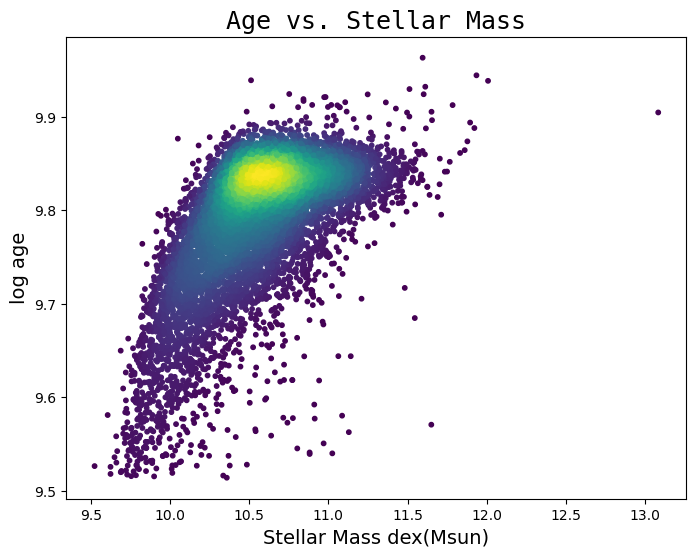

In [11]:
x = df['d']

y = df['logage']
x2 = df['logmstar']

# Calculate the point density
#xy = np.vstack([x,y])
xy = np.vstack([x2,y])
z = gaussian_kde(xy)(xy)


#fig, ax = plt.subplots()
plt.figure(figsize=(8,6))
plt.scatter(x2, y, c=z, s=10)
#plt.colorbar()
## plt.title('Age vs. Distance to Closest Filament', font = 'monospace', fontsize = 18)
plt.title('Age vs. Stellar Mass', font = 'monospace', fontsize = 18)
## plt.xlabel('Distance to closest filament (Mpc/h)', fontsize = 14)
plt.xlabel('Stellar Mass dex(Msun)', fontsize = 14)
plt.ylabel('log age', fontsize = 14)

plt.show()

In [ ]:
### Saves new dataframe as csv file after removing outliers (so I don't have to do all that work each time)

# df.to_csv('FilFinding_Data3_Properties.csv', index=False)

# df2 =  pd.read_csv('/Users/Daniel/Desktop/Research_Projects/NYCCT_Cosmic_Filaments/FilsGalsProperties_stats.csv')

# Calculate the point density -- DOES NOT WORK 
xy = np.vstack([d])
Z = gaussian_kde(d)(d)


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(x, y, c=Z, s=10)
plt.colorbar()